# Author- Babita Rawat

## Data Science & Business Analytics Intern at [The Sparks Foundation](https://www.linkedin.com/company/the-sparks-foundation/mycompany/)

## Task 1: Prediction using Supervised ML

## Objective : Predict the percentage of an student based on the number of study hours. Also, What will be predicted score if a student studies for 9.25 hrs/ day?

### About DataSet

The Given Dataset contains two columns, one is the number of hours the student has studied and the other one is marks scored by him. The dataset is [Student Score DataSet](http://bit.ly/w-data)

### About Model

Linear regression is an algorithm used to predict, or visualize, a relationship between two different features/variables. In linear regression tasks, there are two kinds of variables being examined: the dependent variable and the independent variable.The independent variable is the variable that stands by itself, not impacted by the other variable. As the independent variable is adjusted, the levels of the dependent variable will fluctuate. The dependent variable is the variable that is being studied, and it is what the regression model solves for/attempts to predict. In this case, Study Hour is independent whereas Score is Dependent.

## Linear Regression with Python Scikit Learn

In this task, we will use Python Scikit-Learn Library to implement regression. We will start with Simple Linear Regression involving two variables.

### Importing Required Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

### Exploring Data

In [4]:
data=pd.read_csv("http://bit.ly/w-data")
print("The dataSet has imported SUCCESSFULLY!!!")
data.head()
# this will show 5 top rows of the data set

The dataSet has imported SUCCESSFULLY!!!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


We can see that 1st column is hours(independent variable)  and 2nd column is Scores(Dependent variable).

In [5]:
data.shape

(25, 2)

We have 25 rows in our DataSet.

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We have used the describe function on our dataset to know the basic details of our data which includes min, max, mean, std values etc of each columns.

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in our dataset thus we can start visualizing our data.

### Data Visualization

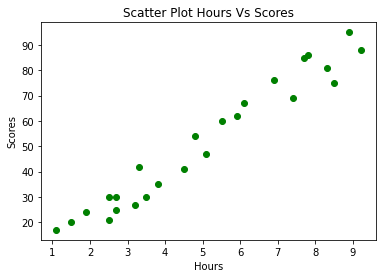

In [31]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
plt.plot(x,y,"go")
plt.title("Scatter Plot Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [12]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We observe that there is a positive linear realtion between the number of hours studied and percentage of score.

<AxesSubplot:>

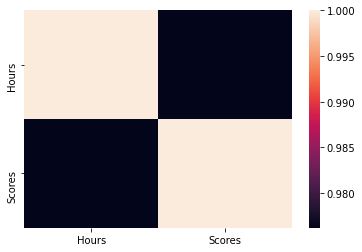

In [15]:
sns.heatmap(data.corr())

Above figures gives us the good picture of the positive relation.

### Splitting the data

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("Size of training set : ",len(x_train))
print("Size of test set : ",len(x_test))

Size of training set :  20
Size of test set :  5


The data has been splitted into (80 is to 20)% ratio. 80% data will be used to train our data and rest 20% will be used to test our model. 

### Training the data

In [25]:
lg=LinearRegression()
lg.fit(x_train, y_train)
print("Model is TRAINED!!")

Model is TRAINED!!


### Plotting The Regression Line

In [26]:
reg_coef=lg.coef_
print("Slope/Regression Coeficient of the model : ", reg_coef[0])
reg_const=lg.intercept_
print("Intercept/Regression Constant of the model : ", reg_const)

Slope/Regression Coeficient of the model :  9.910656480642237
Intercept/Regression Constant of the model :  2.018160041434683


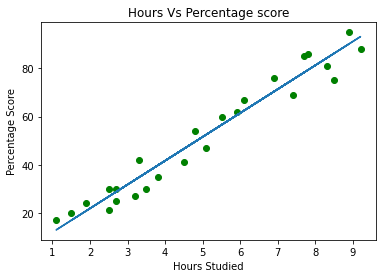

In [30]:
line=reg_coef*x + reg_const
plt.scatter(x,y,color='green')
plt.plot(x,line)
plt.title("Hours Vs Percentage score")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [32]:
print("Training score : ", lg.score(x_train, y_train))

Training score :  0.9515510725211552


Here We can see that our model is aprox 95% accurate to predict further.

### Making predictions

In [33]:
y_pred=lg.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Comparing Actual and predicted Data

In [34]:
df=pd.DataFrame({"Actual" : y_test,"Predicted" : y_pred, "Difference/Error" : y_test-y_pred})
df

,Actual,Predicted,Difference/Error
5,20,16.884145,3.115855
2,27,33.732261,-6.732261
19,69,75.357018,-6.357018
16,30,26.794801,3.205199
11,62,60.491033,1.508967


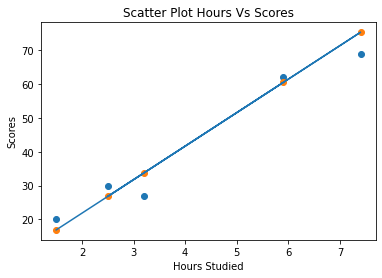

In [35]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)
plt.plot(x_test, y_pred)
plt.title("Scatter Plot Hours Vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

### predicted score if a student studies for 9.25 hrs/ day

In [36]:
hours=[[9.25]]
pred_score=lg.predict(hours)
print("Score Obtained by the student if he studies for 9.25 hrs/day : " ,pred_score[0])

Score Obtained by the student if he studies for 9.25 hrs/day :  93.69173248737538


### Model Evaluation

for Evaluation of the Regression Model Sklearn module provide many metrics. We are going to evaluate our model:

1.__Mean Absolute Error__ : It measures the average magnitute of the errors in a set of predictions, without considering their direction.<br>2.__Mean Sqaured Error__ : It measures the average squared difference between the estimated values and the actual value.
<br>3.__Root Mean Squared Error__ : It is the square root of the average of squared differences between prediction and actual observation.
<br>4.__$R^{2}$ Score__ : It provides an indication of goodness of fit and therefore, a measure of how well unseen samples are likely to be predicted by model, through the proportion of explained variance. Best possible score is 1.0 and it can be negative(because the model can be arbitrarily worse).

In [38]:
print("Mean Absolute Error : ", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : ", mean_squared_error(y_test,y_pred,squared=False))
print("R2 Score : ", r2_score(y_test,y_pred))

Mean Absolute Error :  4.183859899002975
Mean Squared Error :  21.5987693072174
Root Mean Squared Error :  4.6474476121003665
R2 Score :  0.9454906892105356


## Thank You!!